In [1]:
import pandas as pd
import numpy as np
import re
import os
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import tqdm

In [23]:
ind_utilizacion = pd.read_csv('../new_catalogs/ind_utilizacion.csv',sep='\t')

In [24]:
ind_utilizacion

,num,name
0,1,Call Center
1,2,E-Commerce
2,3,EDI
3,4,Farmared
4,5,iNadro Móvil
5,6,Hand Held SFA
6,7,Inventario en Sitio
7,8,Manual
8,9,Mesa de Negociación
9,10,Mi Farmacia


In [3]:
os.chdir('new_data')

In [4]:
os.listdir()

['2022_10.csv',
 '2022_03.csv',
 '2023_01.csv',
 '2022_08.csv',
 '2022_11.csv',
 '2022_02.csv',
 '2023_02.csv',
 '2022_12.csv',
 '2022_06.csv',
 '2022_01.csv',
 '2022_07.csv',
 '2022_05.csv',
 '2022_04.csv',
 '2022_09.csv']

In [5]:
!ls -lh

total 28G
-rw-r--r-- 1 sbio sbio 2.3G mar 17 15:06 2022_01.csv
-rw-r--r-- 1 sbio sbio 1.9G mar 17 21:16 2022_02.csv
-rw-r--r-- 1 sbio sbio 2.0G mar 17 21:59 2022_03.csv
-rw-r--r-- 1 sbio sbio 1.9G mar 17 22:31 2022_04.csv
-rw-r--r-- 1 sbio sbio 2.0G mar 17 23:01 2022_05.csv
-rw-r--r-- 1 sbio sbio 1.9G mar 17 23:40 2022_06.csv
-rw-r--r-- 1 sbio sbio 2.1G mar 18 00:07 2022_07.csv
-rw-r--r-- 1 sbio sbio 2.0G mar 18 10:09 2022_08.csv
-rw-r--r-- 1 sbio sbio 2.0G mar 18 11:09 2022_09.csv
-rw-r--r-- 1 sbio sbio 2.3G mar 18 11:42 2022_10.csv
-rw-r--r-- 1 sbio sbio 2.2G mar 18 12:11 2022_11.csv
-rw-r--r-- 1 sbio sbio 2.3G mar 18 12:38 2022_12.csv
-rw-r--r-- 1 sbio sbio 2.4G mar 18 13:04 2023_01.csv
-rw-r--r-- 1 sbio sbio 751M mar 30 13:43 2023_02.csv


In [7]:
!wc -l *

   16885145 2022_01.csv
   13925030 2022_02.csv
   15091982 2022_03.csv
   13954663 2022_04.csv
   14800148 2022_05.csv
   14403205 2022_06.csv
   15988705 2022_07.csv
   14698073 2022_08.csv
   14754448 2022_09.csv
   17390525 2022_10.csv
   16454811 2022_11.csv
   16962602 2022_12.csv
   17471474 2023_01.csv
  202780811 total


## Clean & Transform Function

In [6]:
def process_weekly_summary(df, ind_util=6):
    df_ind = df.loc[df.Ind_Utilización == ind_util]
    df_ind.Period_Date = pd.to_datetime(df_ind.Period_Date,format= '%Y-%m-%d')
    df_ind['Weekn'] = df_ind.Period_Date.dt.isocalendar().week
    w_columns = ['Weekn','Destinatario','Material','Piezas_Ventas','Ventas_Netas','Costo_Neto','Utilidad_Bruta']
    df_week = df_ind[w_columns]
    print('Grouping by week')
    df_summary = df_week.groupby(['Weekn','Destinatario','Material',]).sum().reset_index(drop=False)
    return(df_summary)

In [7]:
## Este es el encabezado genérico proveniente de la base de datos
d_headers = ['oSource','oPeriod','Period_Date','Fe_Contabilización','CeBe','Ind_Utilización','Motivo_de_pedido','Destinatario','Material','Piezas_Ventas','Piezas_Deducciones','Piezas_Netas','Ventas_Totales','Deducciones','Ventas_Netas','Ventas_Brutas','Ofertas','Desc_Comer_','Desc_Total','Costo_Bruto','Ajustes_al_Costo','Bonificaciones','Costo_Neto','Utilidad_Bruta']

In [9]:
## Procesamiento de archivos
for file in tqdm.tqdm(os.listdir()):
    print('Processing file' + file)
    d = pd.read_csv(file,low_memory=False,header=None)
    d.columns = d_headers
    print('Load done, processing ...')
    out = process_weekly_summary(d)
    out_file = ''.join(['../new_summary/weekly_summary_',file])
    out.to_csv(out_file,header=True,index=None)

  0%|                                                                                                                                                                                           | 0/14 [00:00<?, ?it/s]

Processing file2022_10.csv


  0%|                                                                                                                                                                                           | 0/14 [00:05<?, ?it/s]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [13]:
d = pd.read_csv('2023_02.csv',low_memory=False)
d.columns = d_headers
print('Load done, processing ...')
out = process_weekly_summary(d)
out_file = ''.join(['../new_summary/weekly_summary_','2023_02.csv'])
out.to_csv(out_file,header=True,index=None)

Load done, processing ...
Grouping by week


In [14]:
d = pd.read_csv('2023_03.csv',low_memory=False)
d.columns = d_headers
print('Load done, processing ...')
out = process_weekly_summary(d)
out_file = ''.join(['../new_summary/weekly_summary_','2023_03.csv'])
out.to_csv(out_file,header=True,index=None)

Load done, processing ...
Grouping by week


In [11]:
!ls ../new_summary/

input_data_model.csv	     weekly_summary_2022_07.csv
product_summary_2022.csv.gz  weekly_summary_2022_08.csv
weekly_summary_2022_01.csv   weekly_summary_2022_09.csv
weekly_summary_2022_02.csv   weekly_summary_2022_10.csv
weekly_summary_2022_03.csv   weekly_summary_2022_11.csv
weekly_summary_2022_04.csv   weekly_summary_2022_12.csv
weekly_summary_2022_05.csv   weekly_summary_2023_01.csv
weekly_summary_2022_06.csv   weekly_summary_2023_02.csv


In [145]:
out[['Weekn','Destinatario','Material','Piezas_Ventas']]

,Weekn,Destinatario,Material,Piezas_Ventas
0,35,7000008,358,0
1,35,7000008,369,0
2,35,7000008,2031,1
3,35,7000008,2223,1
4,35,7000008,2249,1
...,...,...,...,...
4003331,39,7055880,32128,2
4003332,39,7055880,32386,2
4003333,39,7055880,42141,3
4003334,39,7055880,44584,10


In [11]:
d = pd.read_csv('2022_01.csv',low_memory=False,header=None)

In [12]:
d_headers = ['oSource','oPeriod','Period_Date','Fe_Contabilización','CeBe','Ind_Utilización','Motivo_de_pedido','Destinatario','Material','Piezas_Ventas','Piezas_Deducciones','Piezas_Netas','Ventas_Totales','Deducciones','Ventas_Netas','Ventas_Brutas','Ofertas','Desc_Comer_','Desc_Total','Costo_Bruto','Ajustes_al_Costo','Bonificaciones','Costo_Neto','Utilidad_Bruta']

In [140]:
!mkdir ../new_summary

In [13]:
d.columns = d_headers

In [16]:
d.head()

,oSource,oPeriod,Period_Date,Fe_Contabilización,CeBe,Ind_Utilización,Motivo_de_pedido,Destinatario,Material,Piezas_Ventas,...,Ventas_Netas,Ventas_Brutas,Ofertas,Desc_Comer_,Desc_Total,Costo_Bruto,Ajustes_al_Costo,Bonificaciones,Costo_Neto,Utilidad_Bruta
0,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30451,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,-3.27,-3.27,3.27
1,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30676,1,...,497.61,497.61,0.00,0.0,0.00,413.10,0.0,0.00,413.10,84.51
2,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30836,1,...,169.99,180.84,-10.85,0.0,-10.85,137.64,0.0,0.00,137.64,32.35
3,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,31190,1,...,158.81,158.81,0.00,0.0,0.00,133.67,0.0,0.00,133.67,25.14
4,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,31545,2,...,123.66,123.66,0.00,0.0,0.00,103.42,0.0,0.00,103.42,20.24


In [20]:
ventas_netas = d.groupby('Ind_Utilización').Ventas_Netas.sum().to_frame().reset_index()
ind_cat = ind_utilizacion.set_index('num').to_dict()['name']
ventas_netas['Name']= ventas_netas.Ind_Utilización.map(ind_cat)

In [49]:
ventas_netas

,Ind_Utilización,Ventas_Netas,Name
0,1,2.679297e+08,Call Center
1,2,1.395642e+08,E-Commerce
2,3,1.481841e+09,EDI
3,4,1.695903e+06,Farmared
4,5,2.151748e+08,iNadro Móvil
5,6,1.556078e+09,Hand Held SFA
6,7,3.483627e+07,Inventario en Sitio
7,8,1.780373e+08,Manual
8,9,4.455378e+07,Mesa de Negociación
9,10,3.401154e+04,Mi Farmacia


[Text(0, 0, 'Call Center'),
 Text(1, 0, 'E-Commerce'),
 Text(2, 0, 'EDI'),
 Text(3, 0, 'Farmared'),
 Text(4, 0, 'iNadro Móvil'),
 Text(5, 0, 'Hand Held SFA'),
 Text(6, 0, 'Inventario en Sitio'),
 Text(7, 0, 'Manual'),
 Text(8, 0, 'Mesa de Negociación'),
 Text(9, 0, 'Mi Farmacia'),
 Text(10, 0, 'Refacturación'),
 Text(11, 0, 'SAFE SFA'),
 Text(12, 0, 'Servicios'),
 Text(13, 0, 'TOP 8 SFA'),
 Text(14, 0, 'TOP 8'),
 Text(15, 0, 'OrdeNadro'),
 Text(16, 0, 'NLinea'),
 Text(17, 0, 'Surtido Inmediato'),
 Text(18, 0, 'SFA Genéricos'),
 Text(19, 0, 'Surtido Inmediato CC'),
 Text(20, 0, 'Sin asignar')]

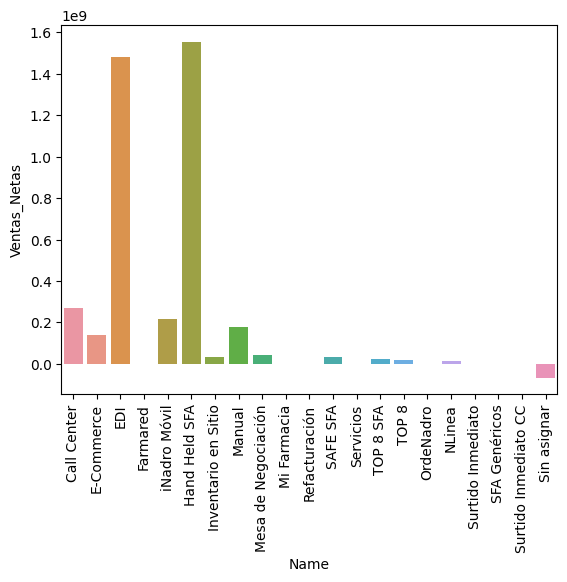

In [54]:
ax = sns.barplot(x = 'Name',
            y = 'Ventas_Netas',
            data = ventas_netas)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [55]:
d6 = d.loc[d.Ind_Utilización == 6]

In [57]:
d6.shape[0] / d.shape[0]

0.4041094701881447

In [59]:
d6.head()

,oSource,oPeriod,Period_Date,Fe_Contabilización,CeBe,Ind_Utilización,Motivo_de_pedido,Destinatario,Material,Piezas_Ventas,...,Ventas_Netas,Ventas_Brutas,Ofertas,Desc_Comer_,Desc_Total,Costo_Bruto,Ajustes_al_Costo,Bonificaciones,Costo_Neto,Utilidad_Bruta
0,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30451,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,-3.27,-3.27,3.27
1,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30676,1,...,497.61,497.61,0.00,0.0,0.00,413.10,0.0,0.00,413.10,84.51
2,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,30836,1,...,169.99,180.84,-10.85,0.0,-10.85,137.64,0.0,0.00,137.64,32.35
3,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,31190,1,...,158.81,158.81,0.00,0.0,0.00,133.67,0.0,0.00,133.67,25.14
4,2022-01-10-JAN-01.csv,2022 01,2022-01-10,10.01.2022,1000/01TIJ00,6,1000,7018163,31545,2,...,123.66,123.66,0.00,0.0,0.00,103.42,0.0,0.00,103.42,20.24


In [60]:
d6.Period_Date.value_counts()

2022-01-31    713789
2022-01-29    571008
2022-01-30    473444
2022-01-10    241998
2022-01-02    241371
2022-01-03    239296
2022-01-04    223378
2022-01-09    222086
2022-01-17    219381
2022-01-11    219314
2022-01-24    218644
2022-01-07    216704
2022-01-12    211682
2022-01-25    208069
2022-01-06    203068
2022-01-05    200399
2022-01-13    200070
2022-01-21    199215
2022-01-26    198905
2022-01-27    197652
2022-01-14    196398
2022-01-18    196357
2022-01-16    194126
2022-01-23    190720
2022-01-20    189136
2022-01-19    185686
2022-01-28    183922
2022-01-22     24706
2022-01-08     20696
2022-01-15     19146
2022-01-01      3081
Name: Period_Date, dtype: int64

In [63]:
d6.groupby(['Period_Date','Material']).sum()

/tmp/ipykernel_8643/3095048563.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d6.groupby(['Period_Date','Material']).sum()


Ind_Utilización  Destinatario  Piezas_Ventas  \
Period_Date Material                                                 
2022-01-01  3                      12      14038025              0   
            6                      12      14036821              0   
            15                      6       7016760              0   
            22                     12      14052283              0   
            30                      6       7023972              0   
...                               ...           ...            ...   
2022-01-31  47898                   6       7001595              2   
            47900                   6       7023598              4   
            47906                  24      28029514              0   
            47924                  18      21041983              3   
            48012                  66      77274460             33   

                      Piezas_Deducciones  Piezas_Netas  Ventas_Totales  \
Period_Date Material                                                     
2022-01-01  3                          0             0            0.00   
            6                          0             0            0.00   
            15                         0             0            0.00   
            22                         0             0            0.00   
            30                         0             0            0.00   
...                                  ...           ...             ...   
2022-01-31  47898                      0             2          103.00   
            47900                      0             4          183.40   
            47906                     -2            -2            0.00   
            47924                      0             3          189.03   
            48012                      0            33          540.21   

                      Deducciones  Ventas_Netas  Ventas_Brutas  Ofertas  \
Period_Date Material                                                      
2022-01-01  3                 0.0         86.69           0.00    77.43   
            6                 0.0        206.24           0.00   206.24   
            15                0.0          4.44           0.00     0.00   
            22                0.0         10.82           0.00     0.00   
            30                0.0         17.71           0.00     0.00   
...                           ...           ...            ...      ...   
2022-01-31  47898             0.0        103.00         103.00     0.00   
            47900             0.0        183.40         183.40     0.00   
            47906          -215.9       -230.48        -215.90     0.00   
            47924             0.0        189.03         189.03     0.00   
            48012             0.0        540.21         540.21     0.00   

                      Desc_Comer_  Desc_Total  Costo_Bruto  Ajustes_al_Costo  \
Period_Date Material                                                           
2022-01-01  3                9.26       86.69         0.00               0.0   
            6                0.00      206.24         0.00               0.0   
            15               4.44        4.44         0.00               0.0   
            22              10.82       10.82         0.00               0.0   
            30              17.71       17.71         0.00               0.0   
...                           ...         ...          ...               ...   
2022-01-31  47898            0.00        0.00        95.16               0.0   
            47900            0.00        0.00       168.49               0.0   
            47906          -14.58      -14.58         0.00               0.0   
            47924            0.00        0.00       171.06               0.0   
            48012            0.00        0.00       462.00               0.0   

                      Bonificaciones  Costo_Neto  Utilidad_Bruta  
Period_Date Material                                            

In [64]:
d6.groupby(['Period_Date']).sum()

/tmp/ipykernel_8643/4162883080.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d6.groupby(['Period_Date']).sum()


,Ind_Utilización,Destinatario,Material,Piezas_Ventas,Piezas_Deducciones,Piezas_Netas,Ventas_Totales,Deducciones,Ventas_Netas,Ventas_Brutas,Ofertas,Desc_Comer_,Desc_Total,Costo_Bruto,Ajustes_al_Costo,Bonificaciones,Costo_Neto,Utilidad_Bruta
Period_Date,,,,,,,,,,,,,,,,,,
2022-01-01,18486,21624876277,42182836,0,0,0,0.00,0.00,39163.57,0.00,7986.56,31177.01,39163.57,0.00,0.0,16163.70,16163.70,22999.87
2022-01-02,1448226,1694486115377,3698423142,601580,0,601580,60635672.95,0.00,58895321.21,60635672.95,-1255195.31,-485156.43,-1740351.74,52769739.54,0.0,0.00,52769739.54,6125581.67
2022-01-03,1435776,1679965107881,3621263390,625057,-13364,611693,66279037.71,-2468272.04,62102492.88,63810765.67,-1309548.90,-398723.89,-1708272.79,55828335.01,0.0,-475567.62,55352767.39,6749725.61
2022-01-04,1340268,1568267256174,3425847942,586316,-13570,572746,60424016.32,-2345207.29,56405760.18,58078809.03,-1270157.76,-402891.09,-1673048.85,50309051.21,0.0,-455768.04,49853283.17,6552477.03
2022-01-05,1202394,1406869602375,3083670729,516044,-13352,502692,55291083.41,-2916920.19,50848507.98,52374163.22,-1148073.27,-377581.97,-1525655.24,45468495.97,0.0,-457955.78,45010540.19,5837967.73
2022-01-06,1218408,1425604474292,3115993577,565080,-16584,548496,57928577.03,-3532818.87,52777616.24,54395758.16,-1217646.96,-400494.96,-1618141.92,47384146.28,0.0,-413186.96,46970959.32,5806657.04
2022-01-07,1300224,1521343024402,3320789876,599808,-19807,580001,64608559.16,-4038977.48,58706524.26,60569581.68,-1410029.54,-453027.88,-1863057.42,52618776.79,0.0,-421755.30,52197021.49,6509502.72
2022-01-08,124176,145262211729,277106950,0,-9478,-9478,0.00,-2001722.65,-1860161.47,-2001722.65,30836.07,110725.11,141561.18,-1712577.45,0.0,-415318.01,-2127895.46,267733.99
2022-01-09,1332516,1559128028591,3385495983,605248,0,605248,63339296.98,0.00,61133556.09,63339296.98,-1583673.29,-622067.60,-2205740.89,54960842.42,0.0,-9900.62,54950941.80,6182614.34


In [74]:
d6.Period_Date = pd.to_datetime(d6.Period_Date,format= '%Y-%m-%d')

/tmp/ipykernel_8643/1385121271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6.Period_Date = pd.to_datetime(d6.Period_Date,format= '%Y-%m-%d')


In [81]:
d6['Weekn'] = d6.Period_Date.dt.isocalendar().week

/tmp/ipykernel_8643/4101900747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['Weekn'] = d6.Period_Date.dt.isocalendar().week


In [86]:
d6.iloc[2]

oSource               2022-01-10-JAN-01.csv
oPeriod                             2022 01
Period_Date             2022-01-10 00:00:00
Fe_Contabilización               10.01.2022
CeBe                           1000/01TIJ00
Ind_Utilización                           6
Motivo_de_pedido                       1000
Destinatario                        7018163
Material                              30836
Piezas_Ventas                             1
Piezas_Deducciones                        0
Piezas_Netas                              1
Ventas_Totales                       180.84
Deducciones                             0.0
Ventas_Netas                         169.99
Ventas_Brutas                        180.84
Ofertas                              -10.85
Desc_Comer_                             0.0
Desc_Total                           -10.85
Costo_Bruto                          137.64
Ajustes_al_Costo                        0.0
Bonificaciones                          0.0
Costo_Neto                      

In [87]:
w_columns = ['Weekn','Destinatario','Material','Piezas_Ventas','Ventas_Netas','Costo_Neto','Utilidad_Bruta']

In [137]:
d6w = d6[w_columns]

In [ ]:
def process_weekly_summary(df, ind_util=6):
    df_ind = df.loc[df.Ind_Utilización == ind_util]
    df_ind.Period_Date = pd.to_datetime(df_ind.Period_Date,format= '%Y-%m-%d')
    df_ind['Weekn'] = df_ind.Period_Date.dt.isocalendar().week
    w_columns = ['Weekn','Destinatario','Material','Piezas_Ventas','Ventas_Netas','Costo_Neto','Utilidad_Bruta']
    df_week = df_ind[w_columns]
    df_summary = df_week.groupby(['Weekn','Destinatario','Material',]).sum().reset_index(drop=False)
    return(df_summary)

In [ ]:
d6g = d6w.groupby(['Weekn','Destinatario','Material',]).sum().reset_index(drop=False)

In [102]:
# Esta es el dataset reducido de lo anterior
d6.loc[d6.Weekn == 52]

,oSource,oPeriod,Period_Date,Fe_Contabilización,CeBe,Ind_Utilización,Motivo_de_pedido,Destinatario,Material,Piezas_Ventas,...,Ventas_Brutas,Ofertas,Desc_Comer_,Desc_Total,Costo_Bruto,Ajustes_al_Costo,Bonificaciones,Costo_Neto,Utilidad_Bruta,Weekn
1341053,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01BAJ00,6,1000,7023167,5666,1,...,263.34,-13.17,0.00,-13.17,222.56,0.0,0.0,222.56,27.61,52
1341054,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01BAJ00,6,1000,7023167,5682,1,...,252.80,-12.64,0.00,-12.64,213.66,0.0,0.0,213.66,26.50,52
1341055,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01BAJ00,6,1000,7023167,10724,2,...,78.36,0.00,0.00,0.00,69.76,0.0,0.0,69.76,8.60,52
1341056,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01BAJ00,6,1000,7023167,10802,1,...,549.01,0.00,0.00,0.00,488.62,0.0,0.0,488.62,60.39,52
1341057,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01BAJ00,6,1000,7023167,11303,2,...,76.92,-6.15,0.01,-6.14,68.63,0.0,0.0,68.63,2.15,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11463527,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01TUX00,6,1000,7011303,5373,1,...,23.01,0.00,0.00,0.00,20.73,0.0,0.0,20.73,2.28,52
11463528,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01TUX00,6,1000,7011303,5413,2,...,213.04,0.00,0.00,0.00,193.25,0.0,0.0,193.25,19.79,52
11463529,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01TUX00,6,1000,7011303,5416,1,...,35.46,0.00,0.00,0.00,32.39,0.0,0.0,32.39,3.07,52
11463530,2022-01-02-JAN-01.csv,2022 01,2022-01-02,02.01.2022,1000/01TUX00,6,1000,7011303,5656,1,...,263.34,-13.17,0.00,-13.17,222.65,0.0,0.0,222.65,27.52,52


In [100]:
d6.Weekn.unique()

<IntegerArray>
[2, 1, 3, 52, 4, 5]
Length: 6, dtype: UInt32

In [96]:
d6w

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
0,2,7018163,30451,0,0.00,-3.27,3.27
1,2,7018163,30676,1,497.61,413.10,84.51
2,2,7018163,30836,1,169.99,137.64,32.35
3,2,7018163,31190,1,158.81,133.67,25.14
4,2,7018163,31545,2,123.66,103.42,20.24
...,...,...,...,...,...,...,...
16885121,5,7037230,17905,0,-1.12,0.00,-1.12
16885122,5,7037230,17989,0,-0.85,0.00,-0.85
16885123,5,7037230,18487,0,-1.20,0.00,-1.20
16885124,5,7037230,18496,0,-0.95,0.00,-0.95


In [106]:
d6w

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
0,2,7018163,30451,0,0.00,-3.27,3.27
1,2,7018163,30676,1,497.61,413.10,84.51
2,2,7018163,30836,1,169.99,137.64,32.35
3,2,7018163,31190,1,158.81,133.67,25.14
4,2,7018163,31545,2,123.66,103.42,20.24
...,...,...,...,...,...,...,...
16885121,5,7037230,17905,0,-1.12,0.00,-1.12
16885122,5,7037230,17989,0,-0.85,0.00,-0.85
16885123,5,7037230,18487,0,-1.20,0.00,-1.20
16885124,5,7037230,18496,0,-0.95,0.00,-0.95


In [122]:
d6w.loc[(d6w.Material == 18499) & (d6w.Destinatario == 7037230)]

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
286097,2,7037230,18499,1,38.27,34.36,3.91
2779383,2,7037230,18499,1,38.27,34.36,3.91
6942996,1,7037230,18499,1,38.27,34.36,3.91
8058712,3,7037230,18499,1,38.27,34.42,3.85
9392846,4,7037230,18499,1,38.27,34.42,3.85
10181247,4,7037230,18499,1,38.27,34.43,3.84
12344132,1,7037230,18499,2,76.54,68.72,7.82
12595430,4,7037230,18499,0,-4.77,0.00,-4.77
16885125,5,7037230,18499,0,-2.85,0.00,-2.85


In [118]:
d6g = d6w.groupby(['Weekn','Destinatario','Material',]).sum().reset_index(drop=False)

In [134]:
d6g

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
0,1,7000008,8,1,15.56,14.00,1.56
1,1,7000008,10,2,31.12,28.00,3.12
2,1,7000008,77,2,68.98,60.70,8.28
3,1,7000008,113,3,111.18,97.76,13.42
4,1,7000008,115,3,111.18,97.83,13.35
...,...,...,...,...,...,...,...
5638510,52,7050411,40207,1,27.81,24.59,3.22
5638511,52,7050411,43519,1,20.25,17.57,2.68
5638512,52,7050411,44040,1,27.12,24.43,2.69
5638513,52,7050435,11845,2,472.18,415.53,56.65


In [121]:
d6g.loc[(d6g.Material == 18499) & (d6g.Destinatario == 7037230)]

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
905878,1,7037230,18499,3,114.81,103.08,11.73
1947798,2,7037230,18499,2,76.54,68.72,7.82
2934138,3,7037230,18499,1,38.27,34.42,3.85
4439271,4,7037230,18499,2,71.77,68.85,2.92
5298311,5,7037230,18499,0,-2.85,0.00,-2.85


In [131]:
d6g.loc[d6g.Utilidad_Bruta < 0].sort_values(by='Utilidad_Bruta').round(2)

,Weekn,Destinatario,Material,Piezas_Ventas,Ventas_Netas,Costo_Neto,Utilidad_Bruta
2490782,3,7014875,44108,100,383625.00,459614.10,-75989.08
5165515,5,7025304,10618,0,-64560.00,0.00,-64560.00
4793277,5,7005856,9587,0,-57498.00,0.00,-57498.00
4402142,4,7035595,30103,0,-129865.00,-78117.97,-51747.03
3522837,4,7009909,18800,174,160154.12,207650.90,-47496.73
...,...,...,...,...,...,...,...
3595466,4,7011177,11805,2,30.28,30.28,-0.00
4460243,4,7038094,3285,1,16.42,16.42,-0.00
3505110,4,7009742,9779,1,10.83,10.83,-0.00
3877458,4,7018991,11805,1,15.14,15.14,-0.00


In [133]:
d6.loc[(d6.Material == 44108) & (d6.Destinatario == 7014875)]

,oSource,oPeriod,Period_Date,Fe_Contabilización,CeBe,Ind_Utilización,Motivo_de_pedido,Destinatario,Material,Piezas_Ventas,...,Ventas_Brutas,Ofertas,Desc_Comer_,Desc_Total,Costo_Bruto,Ajustes_al_Costo,Bonificaciones,Costo_Neto,Utilidad_Bruta,Weekn
7511143,2022-01-19-JAN-01.csv,2022 01,2022-01-19,19.01.2022,1000/01MNT00,6,1000,7014875,44108,100,...,383625.0,0.0,0.0,0.0,459614.1,0.0,0.0,459614.1,-75989.08,3
